# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg import MADDPG, ReplayBuffer

import os
from utilities import transpose_list, transpose_to_tensor, convert_to_tensor
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='env\Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]


# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.        ]]


In [5]:
env_info.vector_observations

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.65278625, -1.5       , -0.        ,  0.        ,
         6.83172083,  6.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
        -6.83172083,  6.        ,  0.        ,  0.        ]])

In [6]:
env_info.vector_observations

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.65278625, -1.5       , -0.        ,  0.        ,
         6.83172083,  6.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -6.4669857 , -1.5       ,  0.        ,  0.        ,
        -6.83172083,  6.        ,  0.        ,  0.        ]])

In [7]:
env_info.local_done

[False, False]

In [8]:
actions = [[0.2,0.3],[0.5,0.6]]


In [9]:
actions_array = torch.stack(transpose_to_tensor(actions)).detach().numpy()

In [10]:

actions_for_env = np.rollaxis(actions_array,1)

In [11]:
env_info = env.step(actions_for_env)[brain_name] 

In [12]:
env_info.vector_observations

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -6.65278625, -1.5       ,
        -0.        ,  0.        ,  6.83172083,  6.        , -0.        ,
         0.        , -6.05278683, -1.55886006,  6.        , -0.98100001,
         6.83172083,  5.94114017,  6.        , -0.98100001],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -6.4669857 , -1.5       ,
         0.        ,  0.        , -6.83172083,  6.        ,  0.        ,
         0.        , -4.96698475, -0.98316395, 15.        ,  6.21520042,
        -6.83172083,  5.94114017, 15.        ,  6.21520042]])

### 4. Train MADDPG!

To deploy our agent to solve the navigation problem, we first import the agent class we wrote. When training the environment, set train_mode=True, so that the line for resetting the environment looks like the following:

```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [17]:
# setting parameters
# number of parallel environment, each environment has 2 agents
# this would generate more experience and smooth things out
# PARALLEL_ENVS = 1
# Here we only have 1 env for simplicity

# number of training episodes.
# change this to higher number to experiment. say 30000.
NUMBER_OF_EPISODES = 1000
EPISODE_LENGTH = 80
BATCHSIZE = 30

# amplitude of OU noise
# this slowly decreases to 0
# instead of resetting noise to 0 every episode, we let it decrease to 0 over a few episodes
NOISE = 2
NOISE_REDUCTION = 0.9999
BUFFER_SIZE = 5000

IN_ACTOR_DIM = 24 
HIDDEN_ACTOR_IN_DIM = 400
HIDDEN_ACTOR_OUT_DIM = 300
OUT_ACTOR_DIM = 2

# Critic input contains both states AND all the actions of all the agents
# there are 2 agents, so 24*2 + 2*2 = 28
IN_CRIT_DIM = IN_ACTOR_DIM  * num_agents + action_size * num_agents
HIDDEN_CRIT_IN_DIM = 400
HIDDEN_CRIT_OUT_DIM = 300
OUT_CRIT_DIM = 1

# how many episodes before update
UPDATE_EVERY = 2
SEED = 2

In [18]:
# main function that sets up environments
# perform training loop


def pre_process(entity, batchsize):
    processed_entity = []
    for j in range(3):
        list = []
        for i in range(batchsize):
            b = entity[i][j]
            list.append(b)
        c = torch.Tensor(list)
        processed_entity.append(c)
    return processed_entity

def run_maddpg():
    
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    t = 0
    
    noise = NOISE
    noise_reduction = NOISE_REDUCTION

    
    log_path = os.getcwd()+"/log"
    model_dir= os.getcwd()+"/model_dir"
    
    os.makedirs(model_dir, exist_ok=True)

    # torch.set_num_threads(PARALLEL_ENVS)
    # env = envs.make_parallel_env(PARALLEL_ENVS)
    
    # keep 5000 episodes worth of replay

    buffer = ReplayBuffer(int(BUFFER_SIZE*EPISODE_LENGTH))
    # initialize policy and critic through MADDOG
    maddpg = MADDPG(IN_ACTOR_DIM, HIDDEN_ACTOR_IN_DIM, HIDDEN_ACTOR_OUT_DIM, OUT_ACTOR_DIM, IN_CRIT_DIM, HIDDEN_CRIT_IN_DIM, HIDDEN_CRIT_OUT_DIM)
    
    # these will be used to print rewards for agents
    agent0_reward = []
    agent1_reward = []
    scores_deque = deque(maxlen=100)
    best_scores = []
    update_t = 0


    # training loop
    # show progressbar
#     import progressbar as pb
#     widget = ['episode: ', pb.Counter(),'/',str(NUMBER_OF_EPISODES),' ', 
#               pb.Percentage(), ' ', pb.ETA(), ' ', pb.Bar(marker=pb.RotatingMarker()), ' ' ]
    
#     timer = pb.ProgressBar(widgets=widget, maxval=NUMBER_OF_EPISODES).start()

    # use keep_awake to keep workspace from disconnecting
    for episode in range(1, NUMBER_OF_EPISODES+1):

#         timer.update(episode)
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        
        # initialize scores for both agents
        scores = [0,0]   
        
        # in lab, all_obs came directly from env, it has 4 lists, each list has 1 3x14 and 1 1x14
        # obs has 4 lists, getting only the 3x14 from all_obs
        # obs_full on the other hand got the 1x14
        

        #for calculating rewards for this particular episode - addition of all time steps

        for episode_t in range(EPISODE_LENGTH):

            # explore = only explore for a certain number of episodes
            # action input needs to be transposed
            
            state_tensors = convert_to_tensor(states)

            

            actions = maddpg.act(state_tensors, noise = 2)
           
            noise *= noise_reduction
            
            actions_array = torch.stack(actions).detach().numpy()
       
            
            # act (actions)       
            # [tensor([ 0.9857,  0.0912]), tensor([ 0.0951, -0.1229])]
            # stack (actions_array)             
            # [[ 0.98568964  0.09124897]
            #  [ 0.0950533  -0.12286544]]

            # step forward one frame
            
            env_info = env.step(actions_array)[brain_name] 
            
            next_states = env_info.vector_observations

            rewards = env_info.rewards
            dones  = env_info.local_done
            
            update_t = (update_t + 1) % UPDATE_EVERY
            
            
            # add data to buffer            
            transition = (states, actions_for_env, rewards, next_states, dones)
            buffer.push(transition)
                
            # update once after every UPDATE_EVERY (if multiple env, we have to update every time for each env)
            if len(buffer) > BATCHSIZE and update_t == 0:

                for a_i in range(num_agents):
                    samples = buffer.sample(BATCHSIZE)

                    maddpg.update(samples, a_i)

                maddpg.update_targets() #soft update the target network towards the actual networks

            # after updating the networks and getting new scores, update the tracking lists
            agent0_reward.append(scores[0])
            agent1_reward.append(scores[1])

            best_scores.append(max(scores))
            scores_deque.append(max(scores))            
                    
           
            states = next_states
            scores += rewards
            
            # if one of the agent is done we are done
            if dones[0]:
                break  


        

        

        
        # print score every 100 episodes and save model 
        if episode % 100 == 0 or episode == NUMBER_OF_EPISODES-1 or  np.mean(scores_deque)>=0.5:
            
            for i in range(num_agents):   
                save_dict = {'actor_params' : maddpg.maddpg_agent[i].actor.state_dict(),
                             'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                             'critic_params' : maddpg.maddpg_agent[i].critic.state_dict(),
                             'critic_optim_params' : maddpg.maddpg_agent[i].critic_optimizer.state_dict()}            

                torch.save(save_dict, os.path.join(model_dir, 'checkpoint.pth'))
            
            print('\rEpisode {}\tAverage Last 100 Episodes Score: {:.2f}'.format(episode, np.mean(scores_deque)))

        # problem solved
        if  np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Last 100 Episodes Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))            

            break             
            

        
   

#     timer.finish()
    return  agent0_reward,  agent1_reward, best_scores



In [19]:
agent0, agent1, best_scores = run_maddpg()

Episode 100	Average Last 100 Episodes Score: 0.00
Episode 200	Average Last 100 Episodes Score: 0.03
Episode 300	Average Last 100 Episodes Score: 0.02
Episode 400	Average Last 100 Episodes Score: 0.04
Episode 500	Average Last 100 Episodes Score: 0.00
Episode 600	Average Last 100 Episodes Score: 0.00
Episode 700	Average Last 100 Episodes Score: 0.00
Episode 800	Average Last 100 Episodes Score: 0.00
Episode 900	Average Last 100 Episodes Score: 0.00
Episode 999	Average Last 100 Episodes Score: 0.00
Episode 1000	Average Last 100 Episodes Score: 0.00


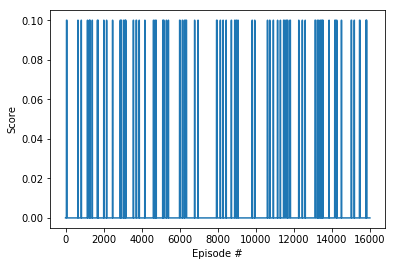

In [20]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(best_scores)), best_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [22]:
a = np.arange(24)

print(a.reshape(2,3,4))

print(a.reshape(6,4))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [19]:
env.close()

ERROR:root:Exception calling application: 
Traceback (most recent call last):
  File "C:\Users\kathl\AppData\Local\conda\conda\envs\drlnd\lib\multiprocessing\connection.py", line 312, in _recv_bytes
    nread, err = ov.GetOverlappedResult(True)
BrokenPipeError: [WinError 109] The pipe has been ended

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kathl\AppData\Local\conda\conda\envs\drlnd\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "C:\Users\kathl\AppData\Local\conda\conda\envs\drlnd\lib\site-packages\unityagents\rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "C:\Users\kathl\AppData\Local\conda\conda\envs\drlnd\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "C:\Users\kathl\AppData\Local\conda\conda\envs\drlnd\lib\multiprocessing\connection.py", line 321, in _recv_

In [10]:
best_scores

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
for state, action in zip(env_info.vector_observations,actions ):
    print(state)
    print(action)

[ 0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.         -6.05278683 -1.55886006
  6.         -0.98100001  6.83172083  5.94114017  6.         -0.98100001]
[0.2, 0.3]
[ 0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.         -5.56698656 -0.98316395
  9.          6.21520042 -6.83172083  5.94114017  9.          6.21520042]
[0.5, 0.6]
